# Trip Advisor Rating Analysis

Description

## EDA

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [59]:
# Keep an unmodified copy of the data loaded if we want to go back to the original dataset
data_orig = pd.read_csv('tripadvisor_hotel_reviews.csv')
data = data_orig.copy()

In [48]:
# Basic information
print(data.shape)
print(data.describe())
print(data.head())

(20491, 2)
             Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


Rating
1    1421
2    1793
3    2184
4    6039
5    9054
dtype: int64


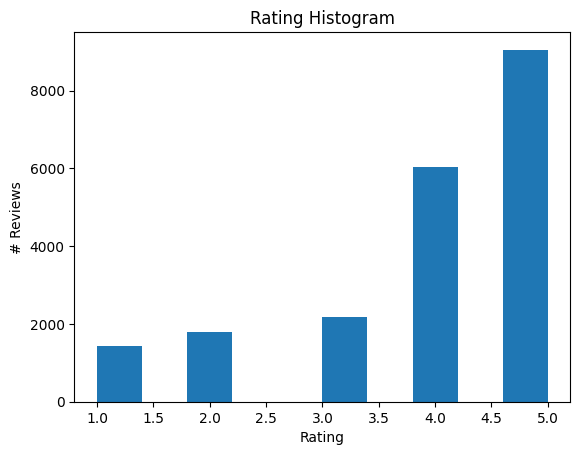

In [49]:
# Look at how many reviews each rating has
print(data.groupby('Rating').size())

plt.hist(data['Rating'])
plt.xlabel('Rating')
plt.ylabel('# Reviews')
plt.title('Rating Histogram')
plt.show()

Nearly half of the ratings are 5 star, and around 75% of all reviews are either 4 or 5 stars. I want to also look at the word clouds for each rating.

5 Star Review Cloud


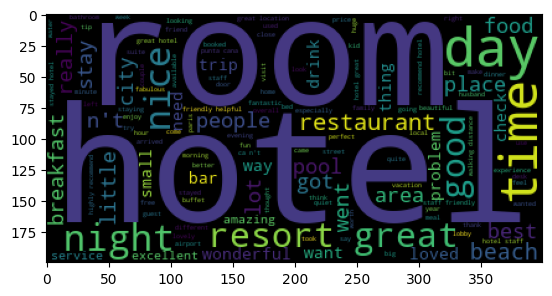

4 Star Review Cloud


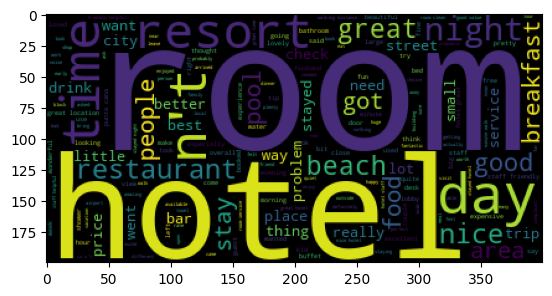

3 Star Review Cloud


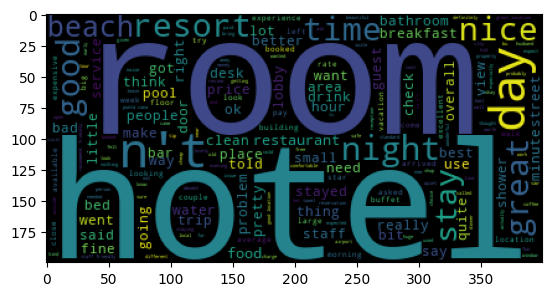

2 Star Review Cloud


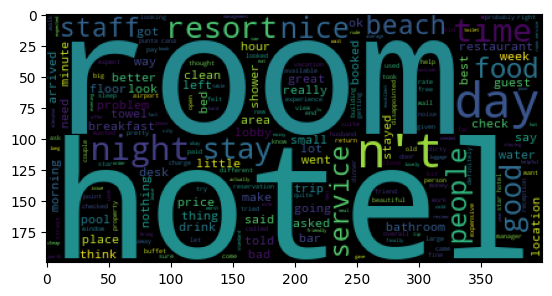

1 Star Review Cloud


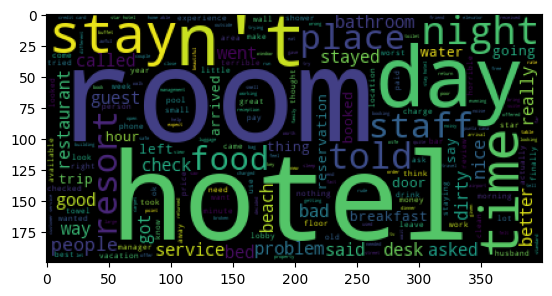

In [50]:
def show_word_cloud(rating):
    wordcloud = WordCloud().generate(' '.join(data[data['Rating'] == rating].Review))
    print(f'{rating} Star Review Cloud')
    plt.imshow(wordcloud)
    plt.show()
    
show_word_cloud(5)
show_word_cloud(4)
show_word_cloud(3)
show_word_cloud(2)
show_word_cloud(1)

It looks like reviews of all ratings have a lot of mentions of 'room', 'hotel', 'day, and 'night', which make sense for hotel reviews, but are not going to be useful for the model, so I'm going to remove them. The presensce of "n't" also seems a bit strange - after some digging, it looks like this dataset was already preprocessed and contractions such as "can't" were split into "can" and "n't", and the word "not" also appears to have been replaced with "n't". While I could recombine these to form the original contractions, it's probably better for the model to leave them separate since it better conveys their negative sentiment.

5 Star Review Cloud


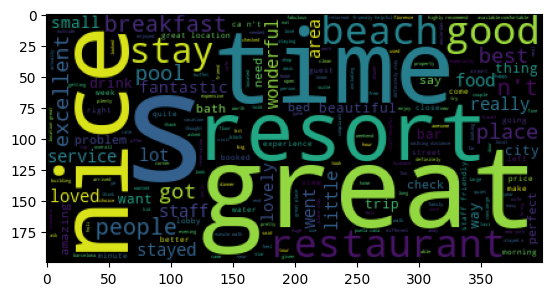

In [ ]:
data['Review'] = data['Review'].str.replace('hotel', '')
data['Review'] = data['Review'].str.replace('room' ,'')
data['Review'] = data['Review'].str.replace('day', '')
data['Review'] = data['Review'].str.replace('night', '')

show_word_cloud(5)
show_word_cloud(4)
show_word_cloud(3)
show_word_cloud(2)
show_word_cloud(1)